<a href="https://colab.research.google.com/github/nikhilv2/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
data= pd.read_csv("/content/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
x = data['YearsExperience'].values
y = data['Salary'].values

In [ ]:
x


array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [ ]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
x.shape   ## ML model accepts only 2d array

(30,)

In [ ]:
y.shape

(30,)

In [ ]:
x = x.reshape(len(x),1)    ## inorder to make this 2d array

In [ ]:
x.shape

(30, 1)

In [ ]:
x.ndim

2

In [ ]:
y.ndim

1

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.80,random_state =0)

In [ ]:
xtest

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [ ]:
#Build the Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
## Train the model
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred = model.predict(xtest)
ypred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [ ]:
xtest

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)

In [ ]:
r2

0.988169515729126

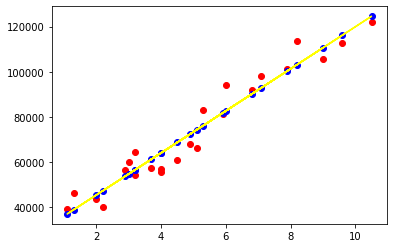

In [ ]:
## Draw the line of regression (Training Samples)
plt.scatter(xtrain,ytrain,color='red')
plt.scatter(xtrain,model.predict(xtrain),color='blue')
plt.plot(xtrain,model.predict(xtrain),color='yellow')
plt.show()

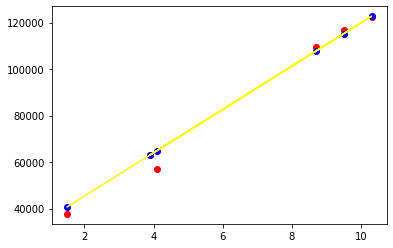

In [ ]:
## Draw the line of regression (Test Samples)
plt.scatter(xtest,ytest,color='red')
plt.scatter(xtest,model.predict(xtest),color='blue')
plt.plot(xtest,model.predict(xtest),color='yellow')
plt.show()

In [ ]:
m = model.coef_
c = model.intercept_
print(m,c)

[9312.57512673] 26780.09915062818


In [ ]:
test_sal = m * 5.5 + c  ## equation of line y= mx+c here x is the number of ecxperience we have to calculate
test_sal

array([77999.26234764])

In [ ]:
model.predict([[5.5]])

array([77999.26234764])

In [ ]:
## Save the model to a file
import joblib 
joblib.dump(model,"salary.pkl")

['salary.pkl']

In [ ]:
## load the model
mymodel = joblib.load("/content/salary.pkl")

In [ ]:
mymodel.predict([[10]])

array([119905.85041792])

In [ ]:
def salary_predict():
  exp = float(input("Enter Experience in Years :"))
  salary = mymodel.predict([[exp]])
  print(salary[0])


In [ ]:
salary_predict()

Enter Experience in Years :1.5
40748.96184072196
